## 캐글 자전거 수요 예측 : https://www.kaggle.com/competitions/bike-sharing-demand/overview
### 목표 : 전처리 방법 변경 및 모델을 Tensorflow 딥러닝 모델로 변경하여 제출 후 스코어 0.8 이하 도달하기

### baseline

In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 불러오기 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# datetime 컬럼을 datetime 타입으로 변환
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

# datetime에서 유용한 특성 추출
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['dayofweek'] = test['datetime'].dt.dayofweek

# 사용할 특성 선택
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 
           'atemp', 'humidity', 'windspeed', 'year', 'month', 
           'day', 'hour', 'dayofweek']

X = train[features]
y = train['count']

# 학습/검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 검증 데이터로 성능 평가
val_pred = rf_model.predict(X_val)
print('검증 데이터 RMSE:', np.sqrt(mean_squared_error(y_val, val_pred)))
print('검증 데이터 MAE:', mean_absolute_error(y_val, val_pred))

# 테스트 데이터 예측
X_test = test[features]
test_pred = rf_model.predict(X_test)

# 제출 파일 생성
submission = pd.DataFrame({
    'datetime': test['datetime'],
    'count': test_pred
})
submission.to_csv('submission.csv', index=False)

print('제출 파일이 생성되었습니다.')


검증 데이터 RMSE: 38.72280624407247
검증 데이터 MAE: 24.220955004591367
제출 파일이 생성되었습니다.


In [38]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [40]:
# 데이터 불러오기 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [42]:
# datetime 컬럼을 datetime 타입으로 변환
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
from datetime import date
import calendar
import warnings
warnings.filterwarnings("ignore")

In [46]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [48]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [50]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [54]:
train.drop(['casual','registered'],axis=1,inplace=True)

In [56]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [58]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [60]:
train.shape, test.shape

((10886, 10), (6493, 9))

In [62]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [64]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

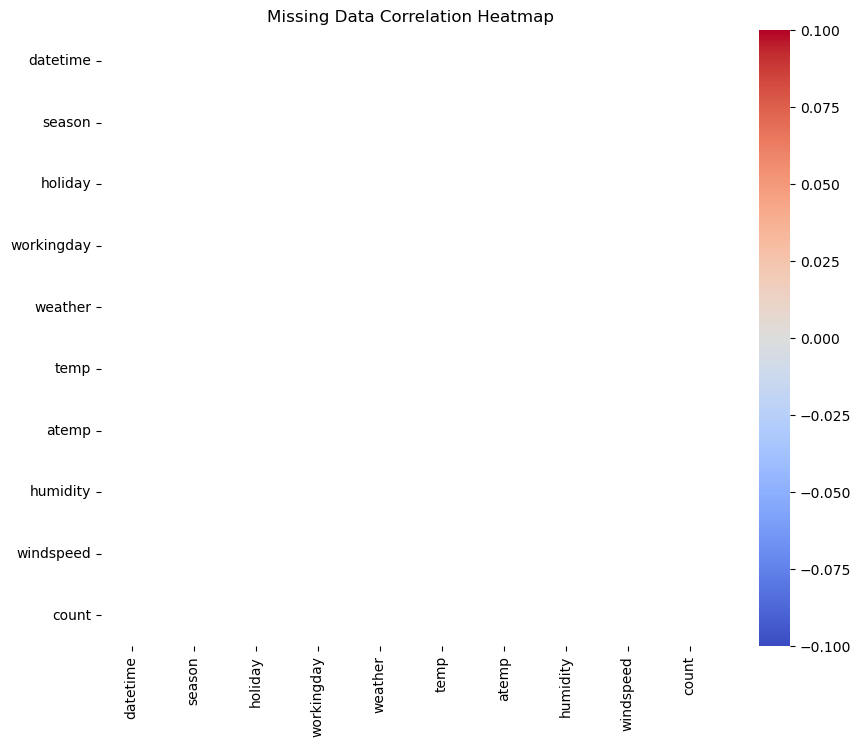

In [66]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.isnull().corr(), cmap="coolwarm", annot=True)
plt.title("Missing Data Correlation Heatmap")
plt.show()

In [68]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

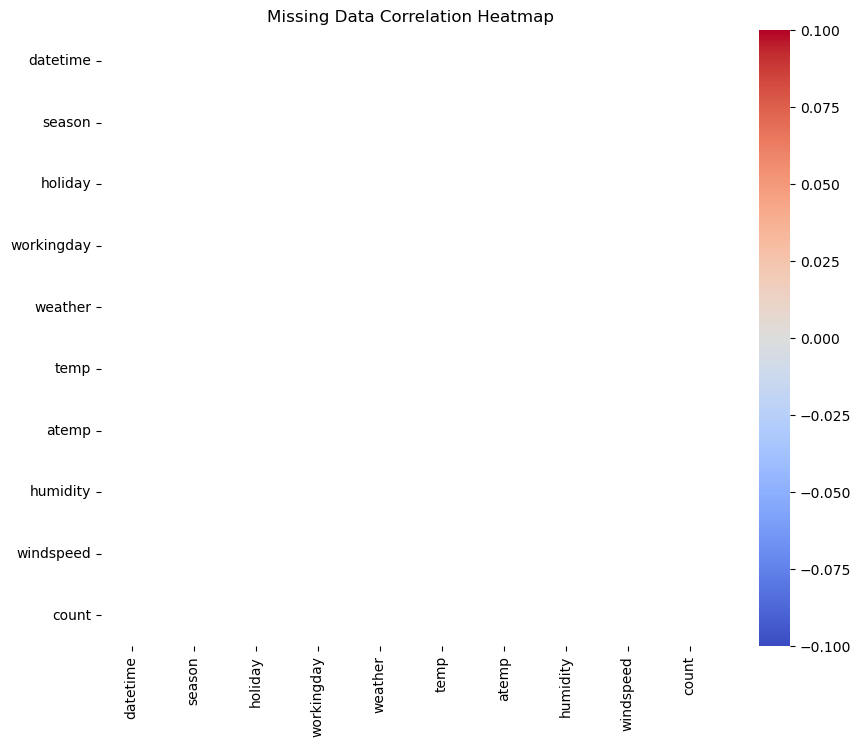

In [70]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.isnull().corr(), cmap="coolwarm", annot=True)
plt.title("Missing Data Correlation Heatmap")
plt.show()

In [72]:
plt.style.use('ggplot')

In [74]:
train.drop('count',axis=1).describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900


In [78]:
sns.pairplot(train);

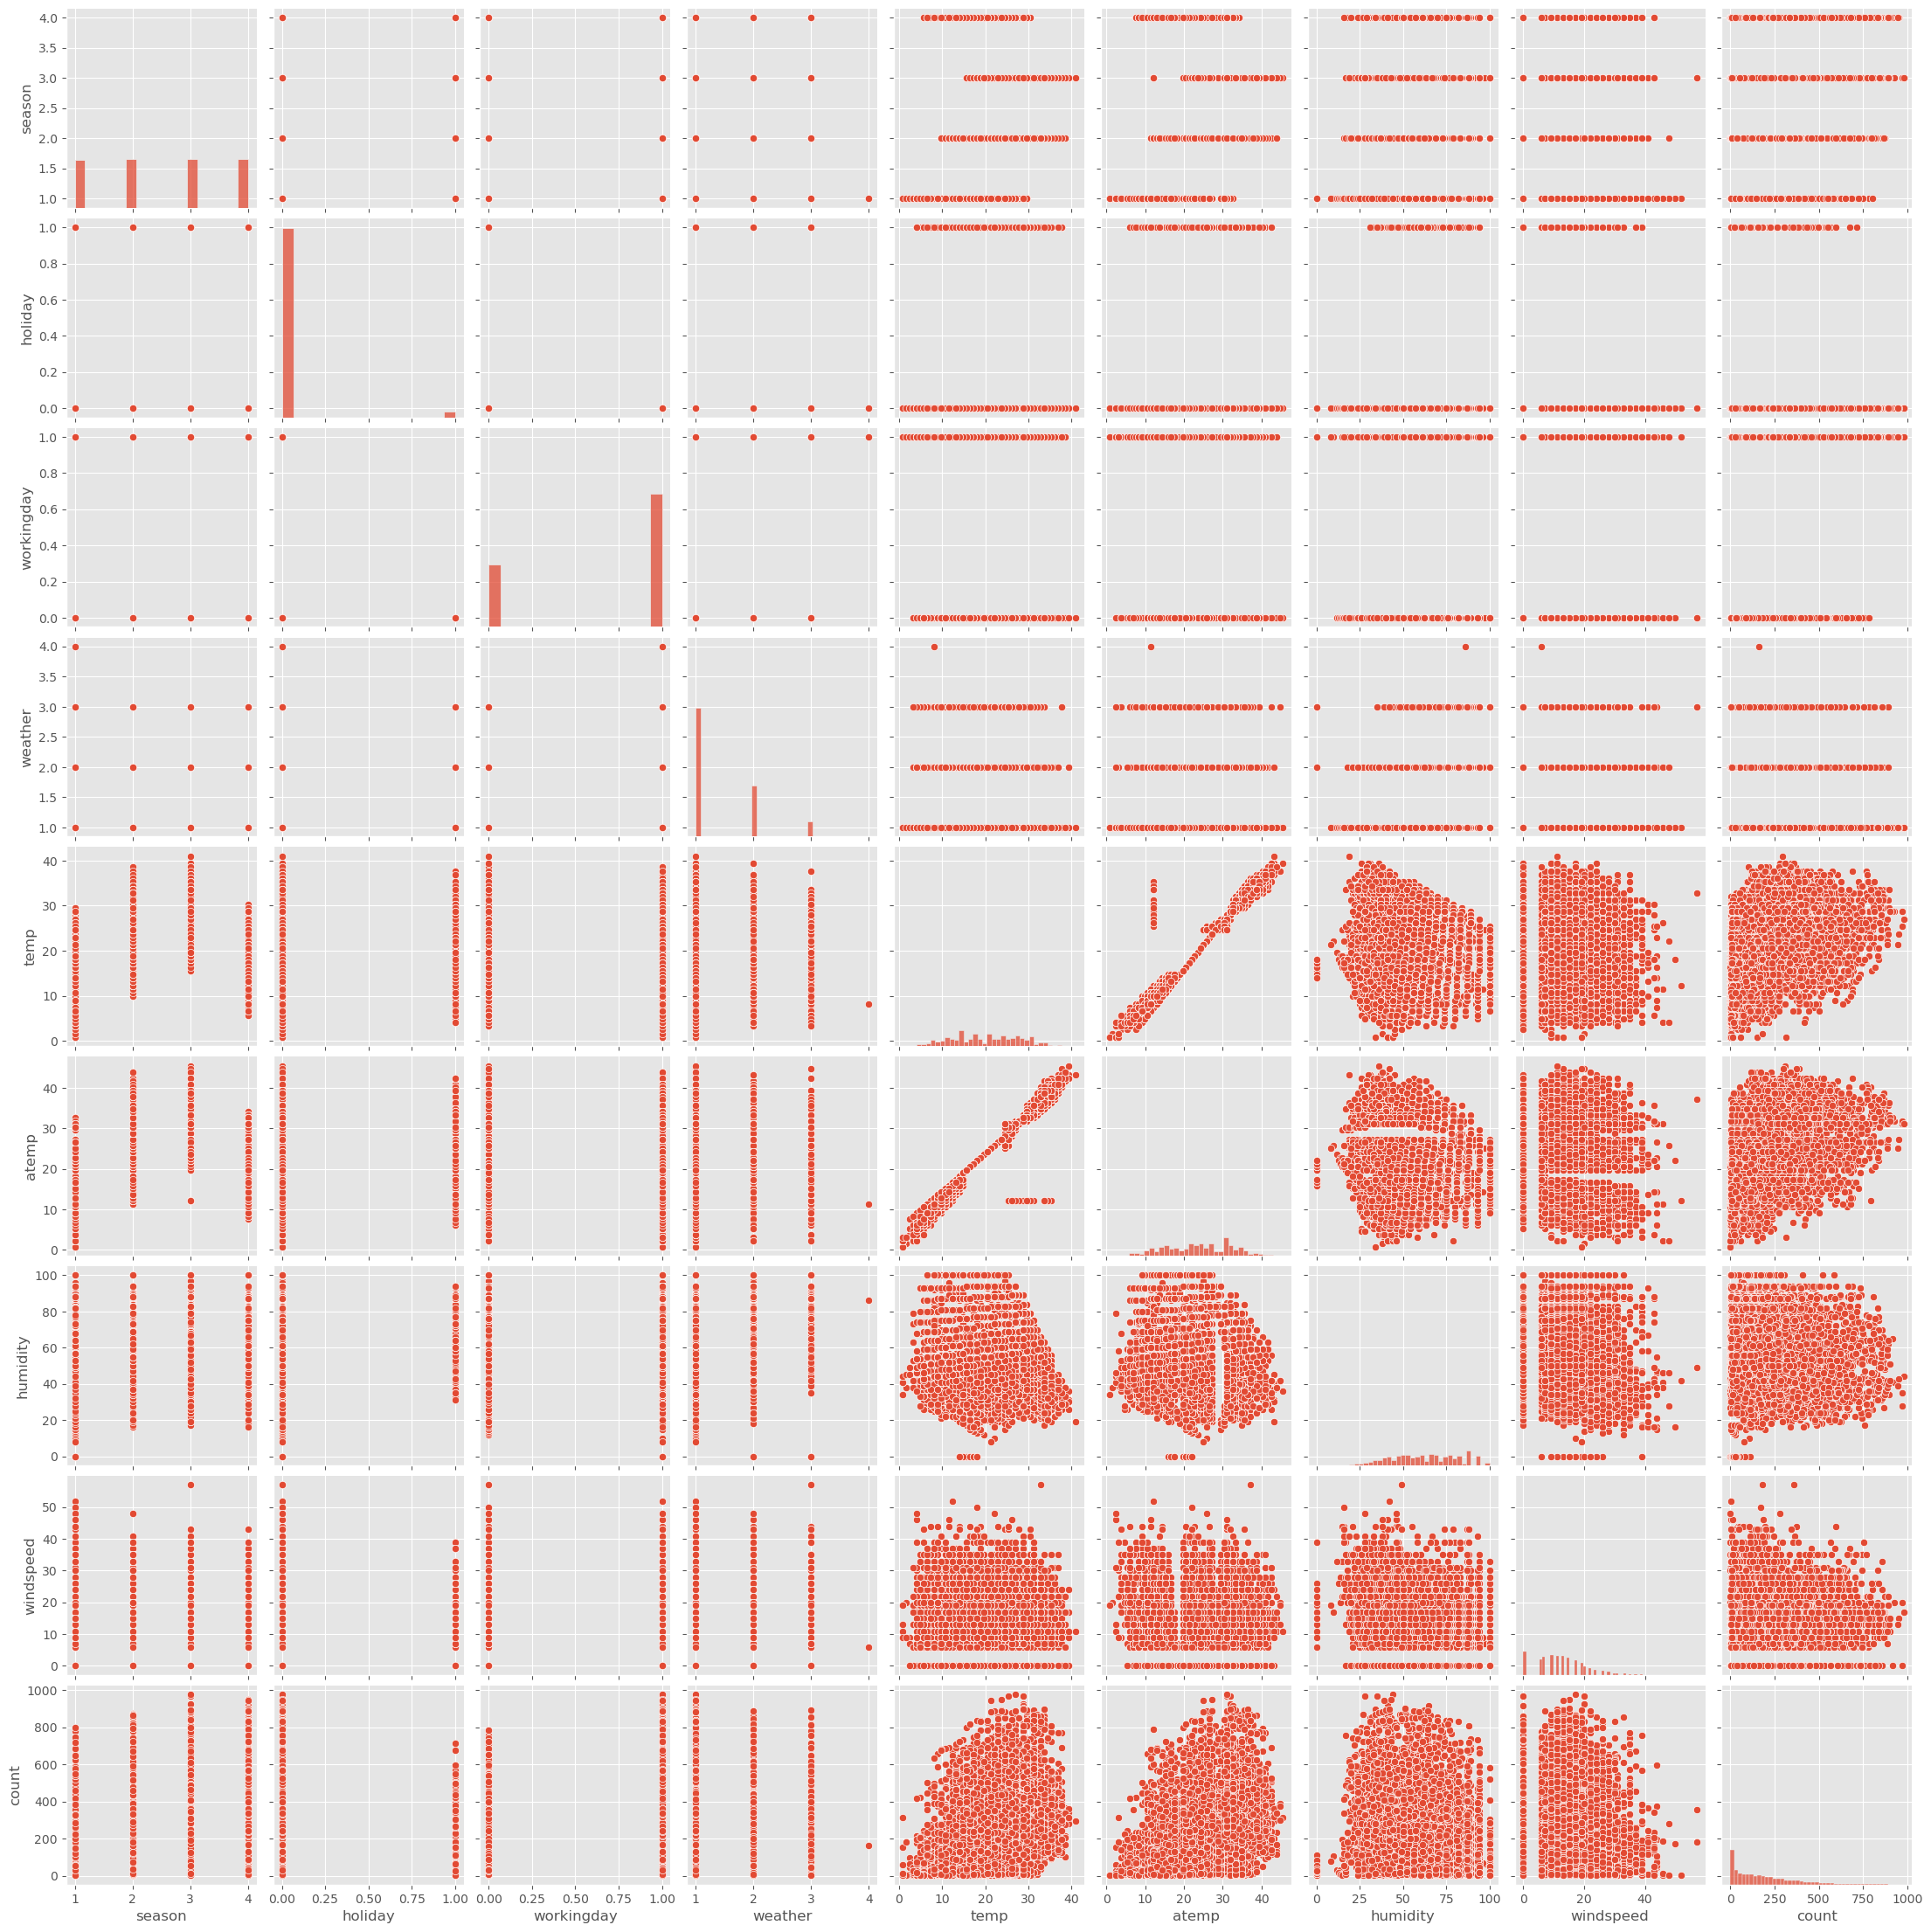

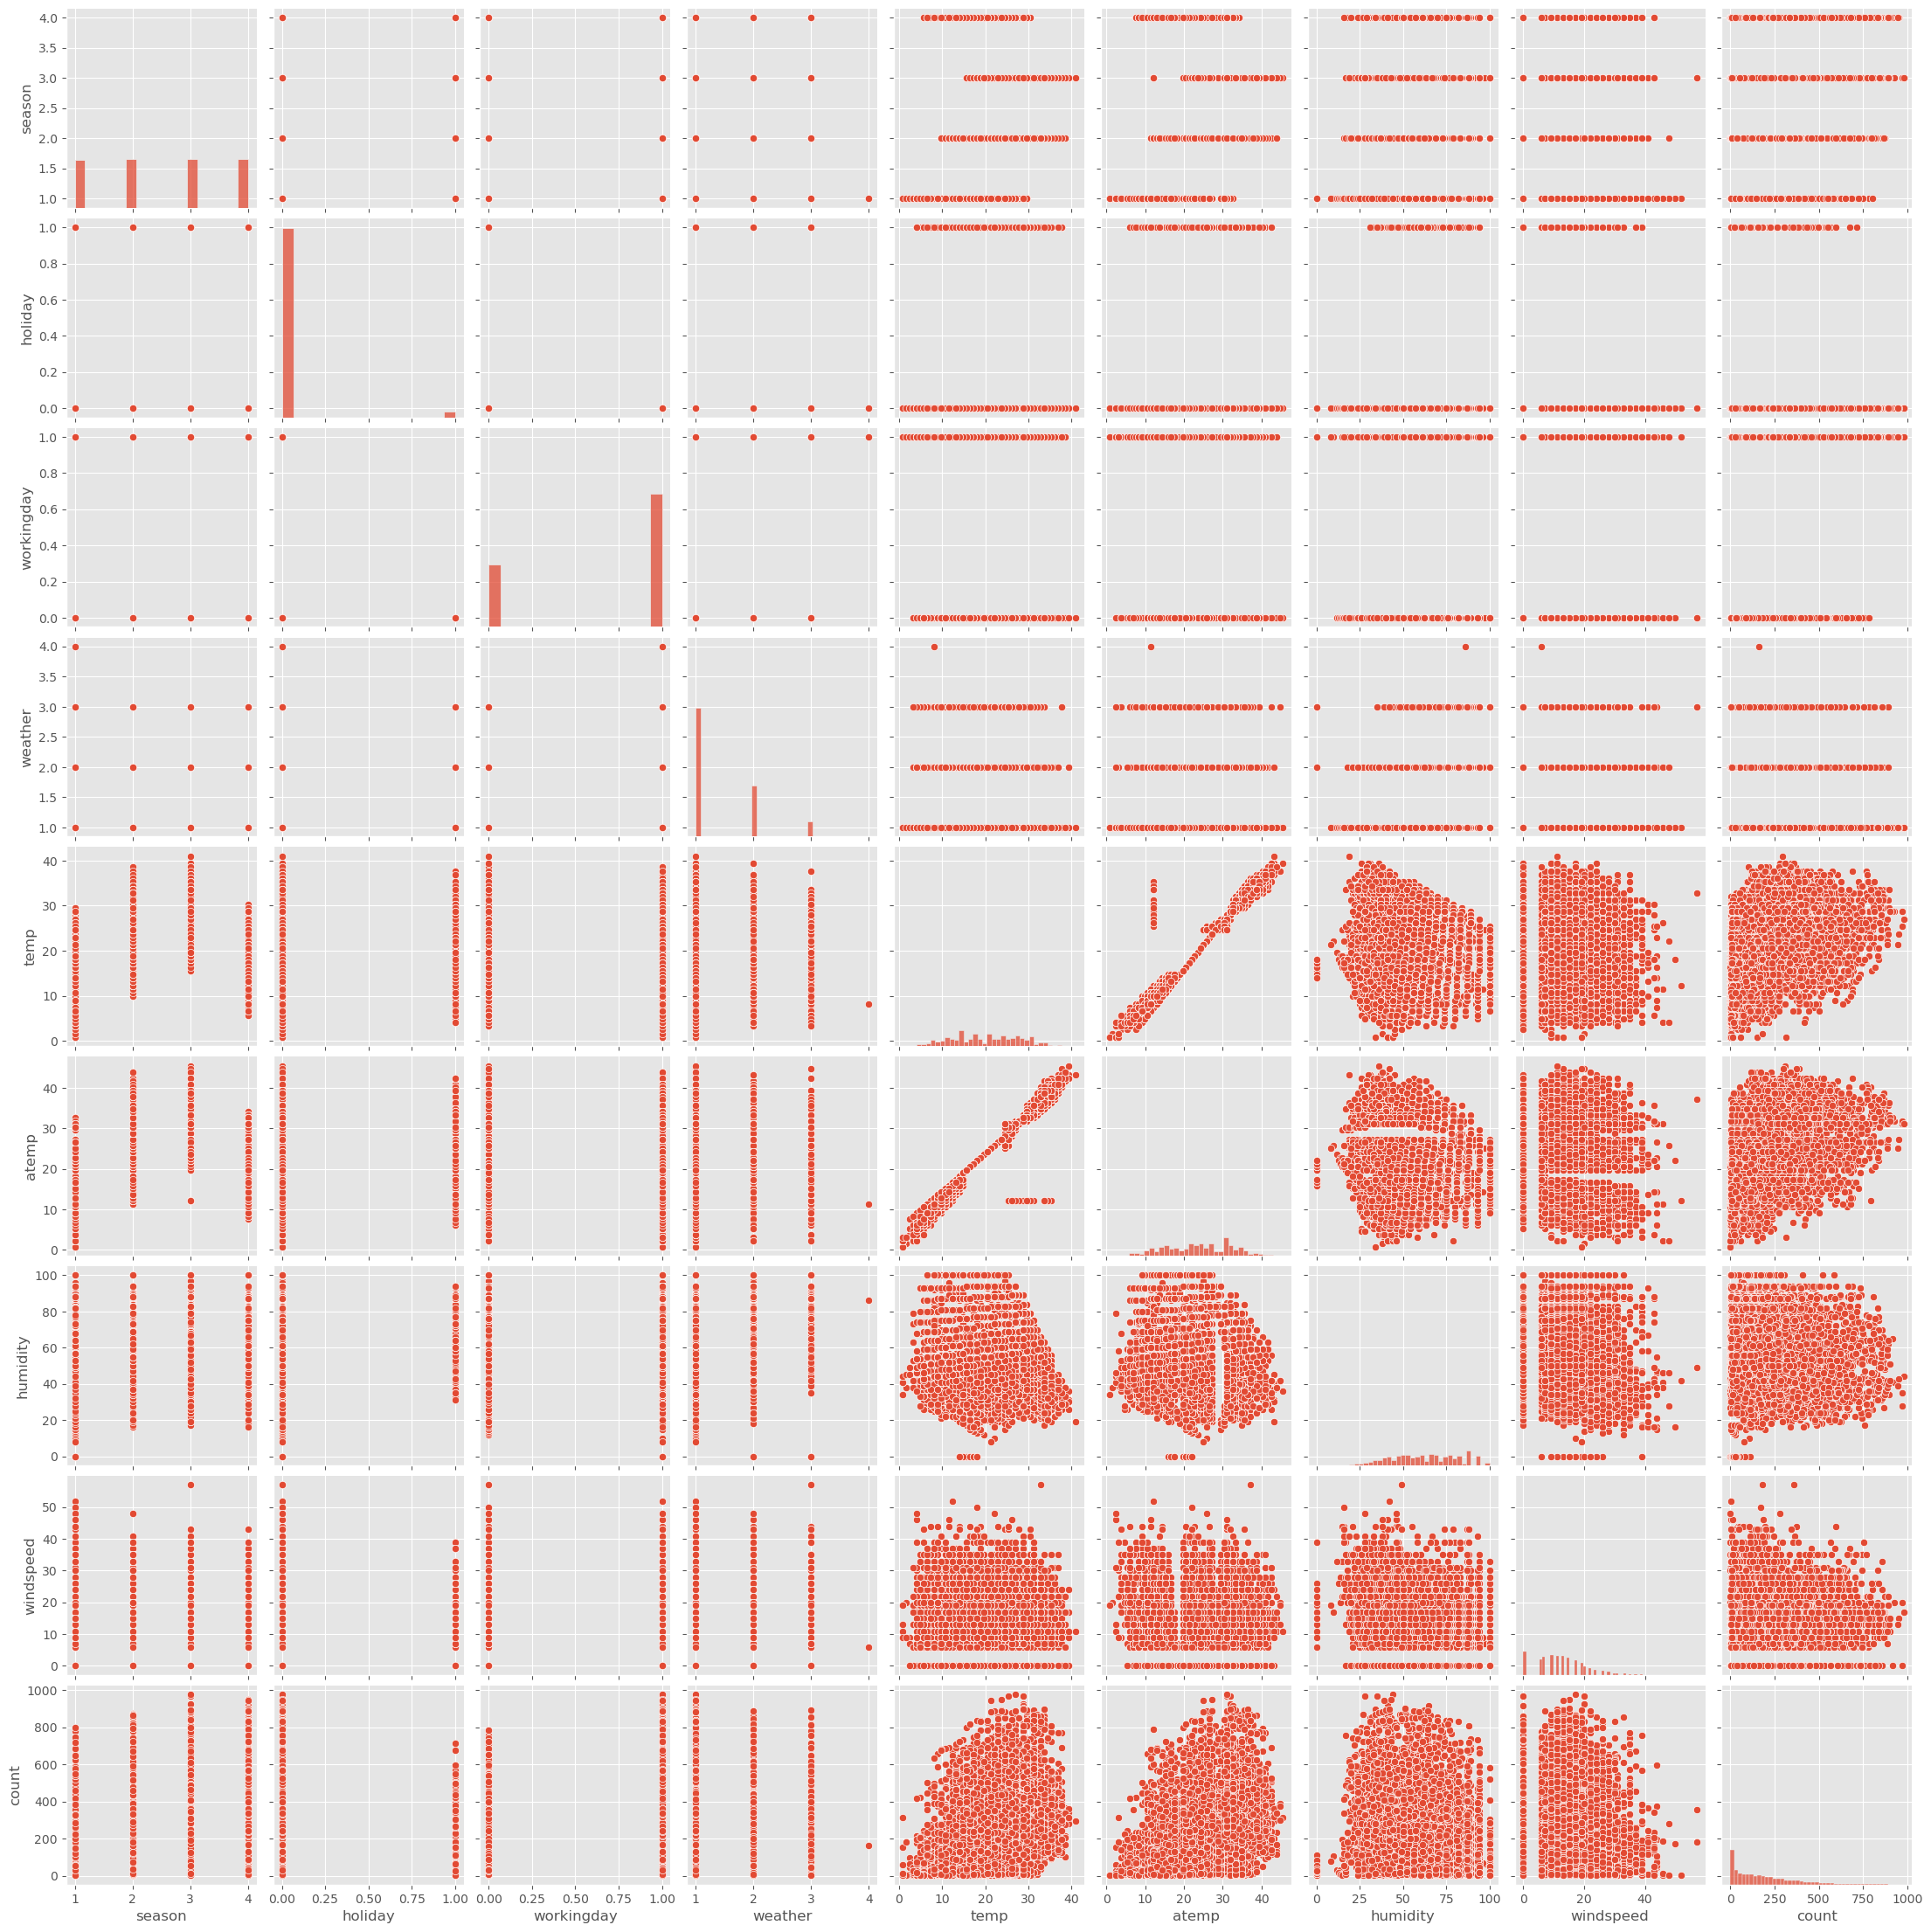

In [80]:
plt.show()

In [82]:
sns.distplot(train['count']);

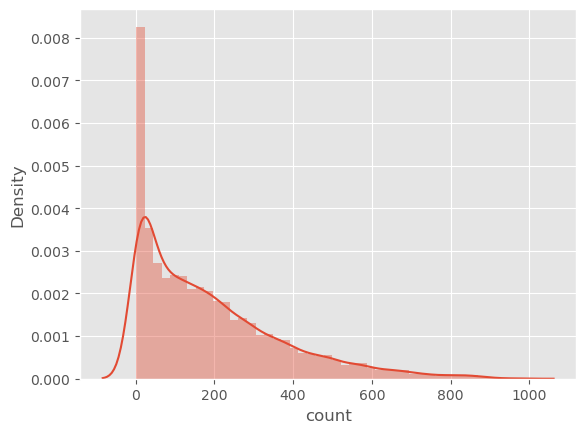

In [84]:
plt.show()

In [90]:
sns.distplot(np.log(train['count']));

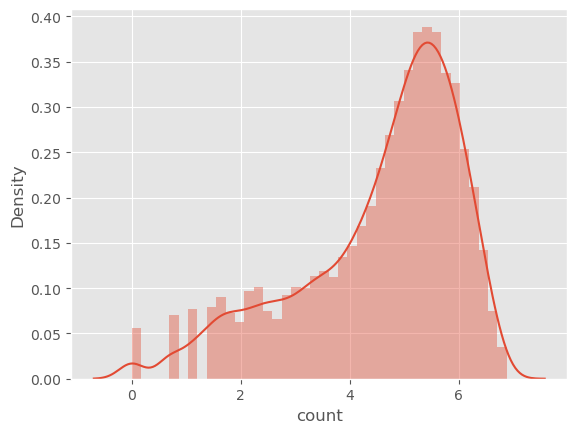

In [92]:
plt.show()

In [94]:
corrdata = train[["temp","atemp","humidity","windspeed","count"]]
corrmat = corrdata.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrmat, annot = True, cmap= 'YlGnBu');

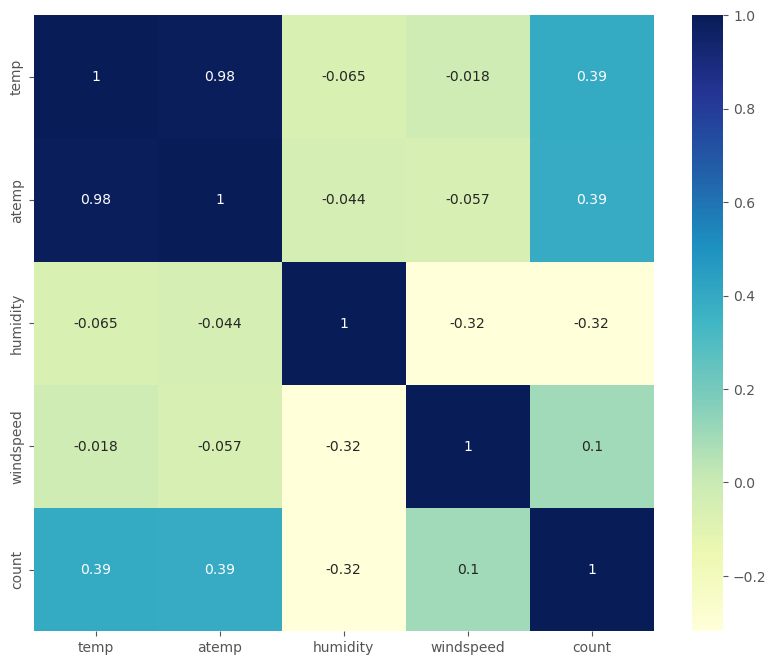

In [96]:
plt.show()

In [100]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [102]:
test['datetime'] = pd.to_datetime(train['datetime'])

In [104]:
#checking the data type of the datetime column
type(train['datetime'][0]), type(test['datetime'][0])

(pandas._libs.tslibs.timestamps.Timestamp,
 pandas._libs.tslibs.timestamps.Timestamp)

In [106]:
train['year'] = train['datetime'].dt.year

In [108]:
train['month'] = train['datetime'].dt.month

In [110]:
train['date'] = train['datetime'].dt.date

In [112]:
train['hour'] = train['datetime'].dt.hour

In [114]:
train['day of the week'] = train['datetime'].dt.dayofweek

In [116]:
test['year'] = test['datetime'].dt.year

In [118]:
test['month'] = test['datetime'].dt.month

In [120]:
test['date'] = test['datetime'].dt.date

In [122]:
test['hour'] = test['datetime'].dt.hour

In [124]:
test['day of the week'] = test['datetime'].dt.dayofweek

In [126]:
#converting day of the weeks to name of the day
dmap = {0:'Mon', 1:'Tue', 2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
train['day of the week'] = train['day of the week'].map(dmap)
test['day of the week'] = test['day of the week'].map(dmap)

In [128]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,date,hour,day of the week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,2011-01-01,0,Sat
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,2011-01-01,1,Sat
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,2011-01-01,2,Sat
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,2011-01-01,3,Sat
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,2011-01-01,4,Sat


In [130]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,date,hour,day of the week
0,2011-01-01 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,2011-01-01,0,Sat
1,2011-01-01 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,2011-01-01,1,Sat
2,2011-01-01 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,2011-01-01,2,Sat
3,2011-01-01 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,2011-01-01,3,Sat
4,2011-01-01 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,2011-01-01,4,Sat


In [132]:
# droppind the datetime column
train.drop('datetime',axis=1,inplace=True)
test.drop('datetime',axis=1,inplace=True)

In [134]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           10886 non-null  int64  
 1   holiday          10886 non-null  int64  
 2   workingday       10886 non-null  int64  
 3   weather          10886 non-null  int64  
 4   temp             10886 non-null  float64
 5   atemp            10886 non-null  float64
 6   humidity         10886 non-null  int64  
 7   windspeed        10886 non-null  float64
 8   count            10886 non-null  int64  
 9   year             10886 non-null  int32  
 10  month            10886 non-null  int32  
 11  date             10886 non-null  object 
 12  hour             10886 non-null  int32  
 13  day of the week  10886 non-null  object 
dtypes: float64(3), int32(3), int64(6), object(2)
memory usage: 1.0+ MB


In [136]:
ymap = {2011:'0',2012:'1'}
train['year'] = train['year'].map(ymap)
test['year'] = test['year'].map(ymap)

In [138]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,date,hour,day of the week
0,1,0,0,1,9.84,14.395,81,0.0,16,0,1,2011-01-01,0,Sat
1,1,0,0,1,9.02,13.635,80,0.0,40,0,1,2011-01-01,1,Sat
2,1,0,0,1,9.02,13.635,80,0.0,32,0,1,2011-01-01,2,Sat
3,1,0,0,1,9.84,14.395,75,0.0,13,0,1,2011-01-01,3,Sat
4,1,0,0,1,9.84,14.395,75,0.0,1,0,1,2011-01-01,4,Sat


In [140]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,date,hour,day of the week
0,1,0,1,1,10.66,11.365,56,26.0027,0,1,2011-01-01,0,Sat
1,1,0,1,1,10.66,13.635,56,0.0000,0,1,2011-01-01,1,Sat
2,1,0,1,1,10.66,13.635,56,0.0000,0,1,2011-01-01,2,Sat
3,1,0,1,1,10.66,12.880,56,11.0014,0,1,2011-01-01,3,Sat
4,1,0,1,1,10.66,12.880,56,11.0014,0,1,2011-01-01,4,Sat


In [142]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           10886 non-null  int64  
 1   holiday          10886 non-null  int64  
 2   workingday       10886 non-null  int64  
 3   weather          10886 non-null  int64  
 4   temp             10886 non-null  float64
 5   atemp            10886 non-null  float64
 6   humidity         10886 non-null  int64  
 7   windspeed        10886 non-null  float64
 8   count            10886 non-null  int64  
 9   year             10886 non-null  object 
 10  month            10886 non-null  int32  
 11  date             10886 non-null  object 
 12  hour             10886 non-null  int32  
 13  day of the week  10886 non-null  object 
dtypes: float64(3), int32(2), int64(6), object(3)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data colu

(None, None)

In [144]:
plt.figure(figsize=(10,5))
sns.barplot(data=train, x = 'day of the week', y = 'count', palette='rainbow');

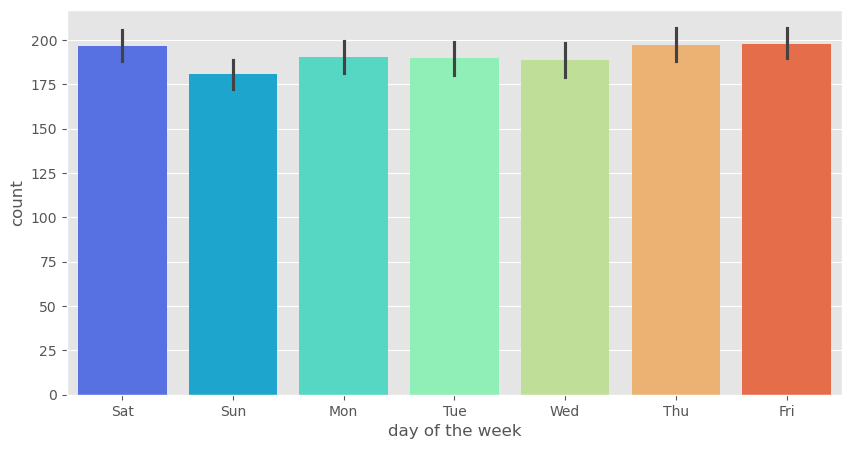

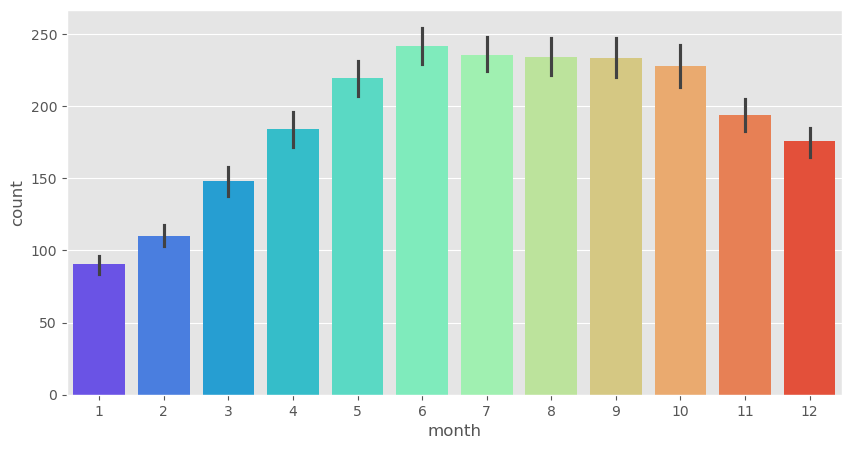

In [150]:
plt.figure(figsize=(10,5))
sns.barplot(data=train, x='month', y = 'count', palette = 'rainbow');
plt.show()

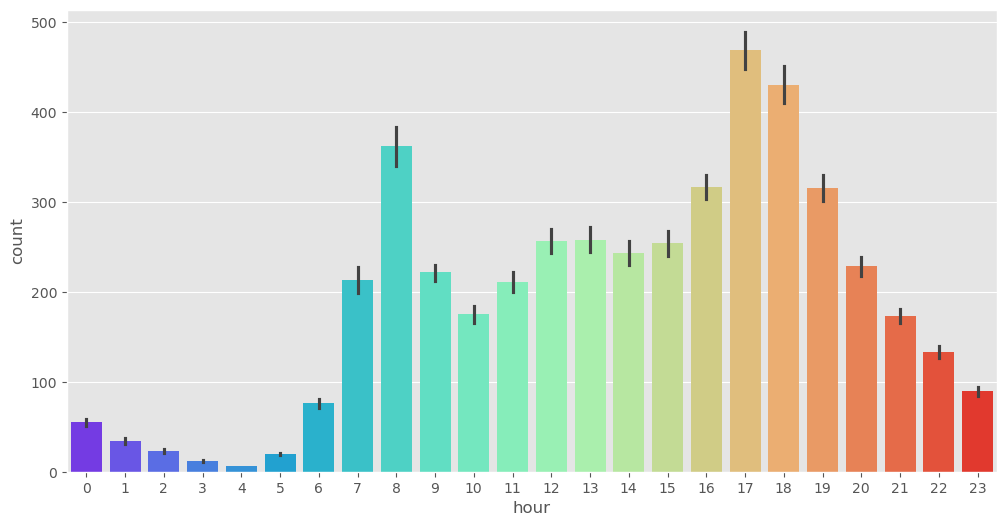

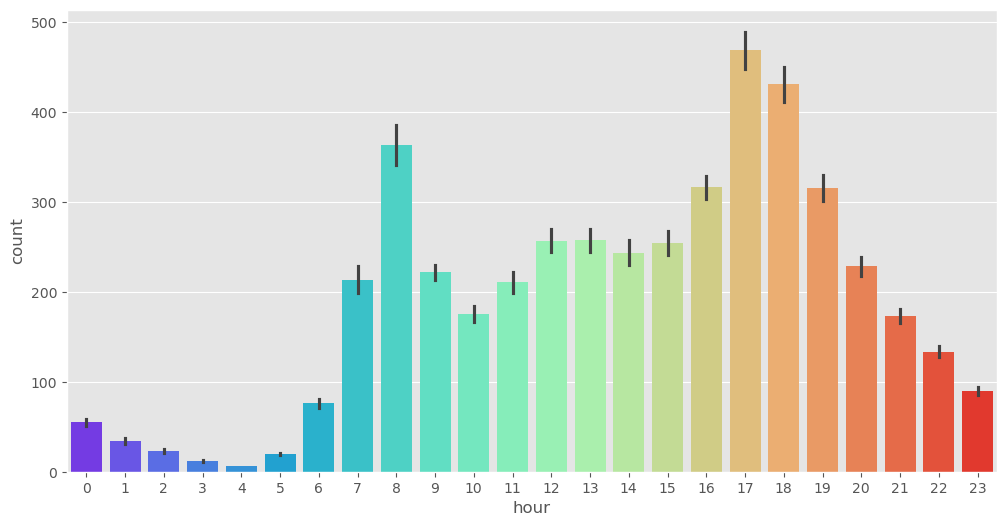

In [154]:
plt.figure(figsize=(12,6))
sns.barplot(data = train, x = 'hour', y = 'count', palette = 'rainbow');
plt.show()


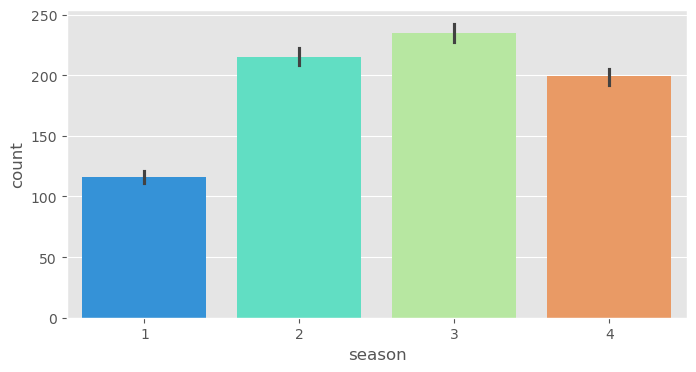

In [156]:
plt.figure(figsize = (8,4))
sns.barplot(data = train, x = 'season', y = 'count', palette = 'rainbow');
plt.show()

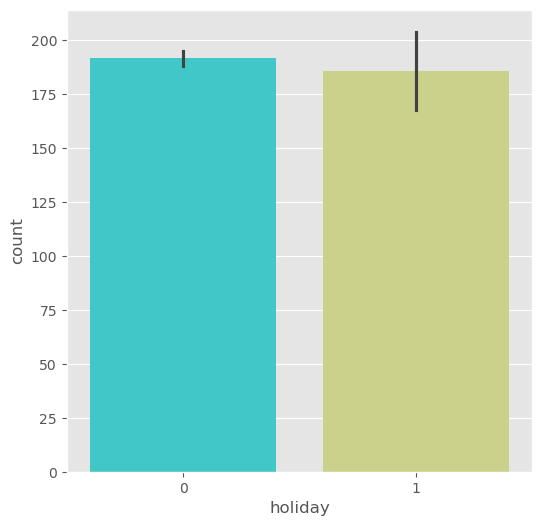

In [158]:
plt.figure(figsize=(6,6))
sns.barplot(data = train, x = 'holiday', y = 'count', palette = 'rainbow');plt.show()

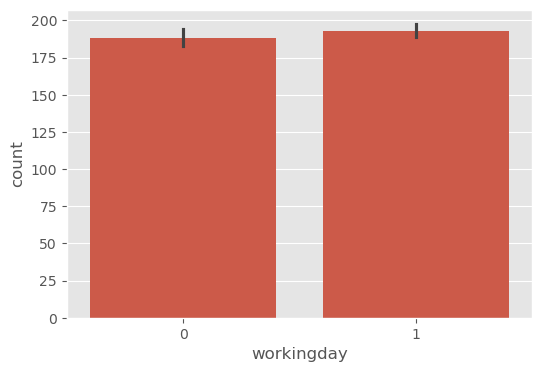

In [160]:
plt.figure(figsize=(6,4))
sns.barplot(data = train, x = 'workingday', y = 'count');
plt.show()

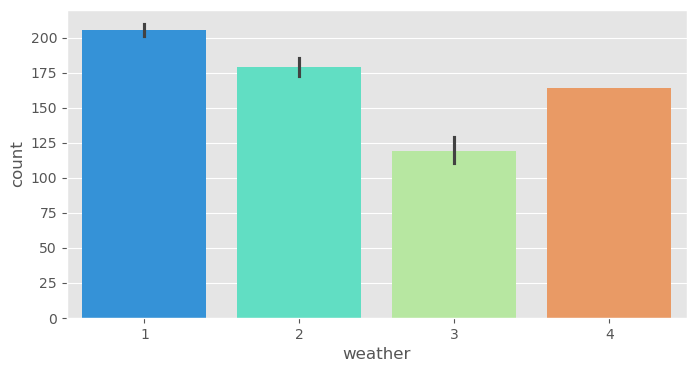

In [162]:
plt.figure(figsize=(8,4))
sns.barplot(data = train, x = 'weather', y = 'count', palette = 'rainbow');
plt.show()

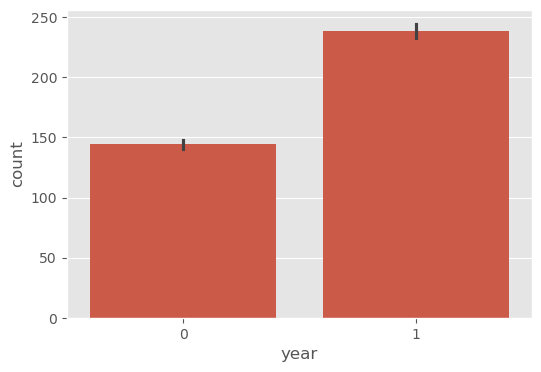

In [164]:
plt.figure(figsize=(6,4))
sns.barplot(data = train, x = 'year', y = 'count');
plt.show()

In [166]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = train, x = 'temp', y = 'count');

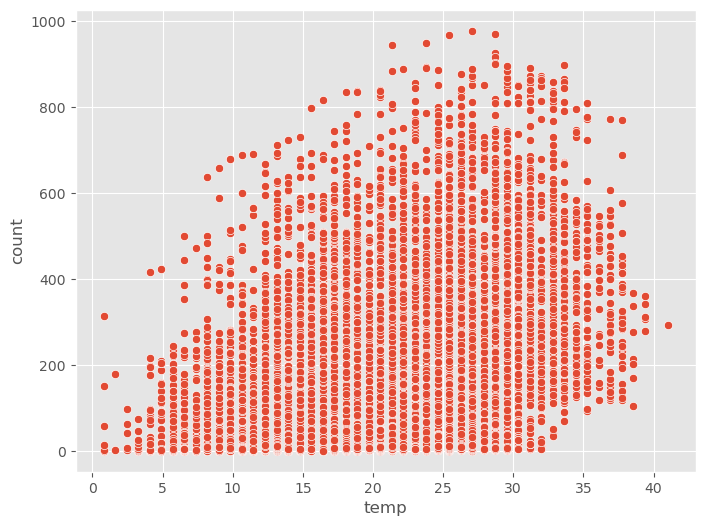

In [168]:
plt.show()

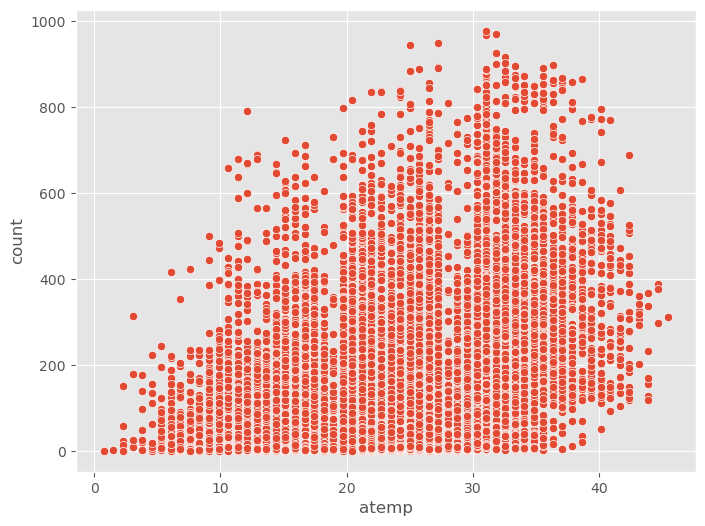

In [170]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = train, x = 'atemp', y = 'count');
plt.show()

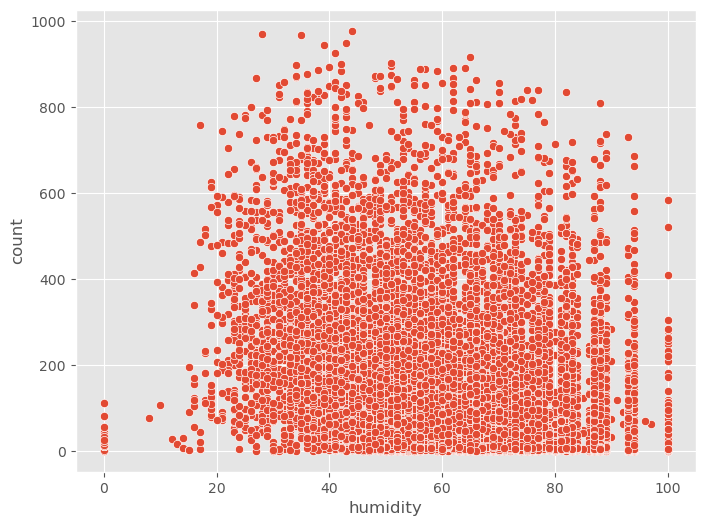

In [172]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = train, x = 'humidity', y='count');
plt.show()

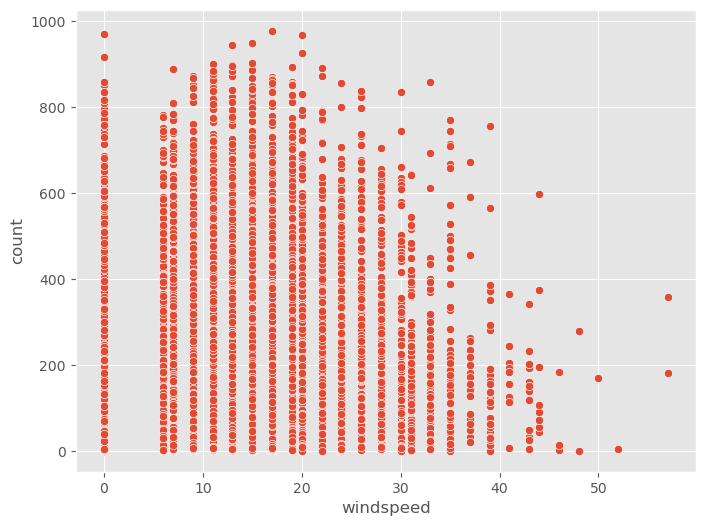

In [174]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = train, x = 'windspeed', y='count');
plt.show()

In [176]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,date,hour,day of the week
0,1,0,0,1,9.84,14.395,81,0.0,16,0,1,2011-01-01,0,Sat
1,1,0,0,1,9.02,13.635,80,0.0,40,0,1,2011-01-01,1,Sat
2,1,0,0,1,9.02,13.635,80,0.0,32,0,1,2011-01-01,2,Sat
3,1,0,0,1,9.84,14.395,75,0.0,13,0,1,2011-01-01,3,Sat
4,1,0,0,1,9.84,14.395,75,0.0,1,0,1,2011-01-01,4,Sat


In [180]:
train.drop(['atemp','date','day of the week','year','windspeed','workingday'], axis=1, inplace=True)

In [182]:
test.drop(['atemp','date','day of the week','year','windspeed','workingday'], axis=1, inplace=True)

In [186]:
train.head()

,season,holiday,weather,temp,humidity,count,month,hour
0,1,0,1,9.84,81,16,1,0
1,1,0,1,9.02,80,40,1,1
2,1,0,1,9.02,80,32,1,2
3,1,0,1,9.84,75,13,1,3
4,1,0,1,9.84,75,1,1,4


In [188]:
train.tail()

,season,holiday,weather,temp,humidity,count,month,hour
10881,4,0,1,15.58,50,336,12,19
10882,4,0,1,14.76,57,241,12,20
10883,4,0,1,13.94,61,168,12,21
10884,4,0,1,13.94,61,129,12,22
10885,4,0,1,13.12,66,88,12,23


In [190]:
# creating dummy variables of the train dataset
season = pd.get_dummies(train['season'],prefix='season',drop_first=True)
weather = pd.get_dummies(train['weather'],prefix='weather',drop_first=True)
holiday = pd.get_dummies(train['holiday'],prefix='holiday',drop_first=True)
month = pd.get_dummies(train['month'],prefix='month',drop_first=True)
hour = pd.get_dummies(train['hour'],prefix='hour',drop_first=True)
train = pd.concat([train,season,weather,holiday,month,hour],axis=1)
train.drop(['season','weather','holiday','month','hour'], axis=1,inplace=True)
train.head()

,temp,humidity,count,season_2,season_3,season_4,weather_2,weather_3,weather_4,holiday_1,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,9.84,81,16,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,9.02,80,40,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,9.02,80,32,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,9.84,75,13,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,9.84,75,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [192]:
#creating dummy variables of the test dataset
# creating dummy variables of the train dataset
season = pd.get_dummies(test['season'],prefix='season',drop_first=True)
weather = pd.get_dummies(test['weather'],prefix='weather',drop_first=True)
holiday = pd.get_dummies(test['holiday'],prefix='holiday',drop_first=True)
month = pd.get_dummies(test['month'],prefix='month',drop_first=True)
hour = pd.get_dummies(test['hour'],prefix='hour',drop_first=True)
test = pd.concat([test,season,weather,holiday,month,hour],axis=1)
test.drop(['season','weather','holiday','month','hour'], axis=1,inplace=True)
test.head()

,temp,humidity,season_2,season_3,season_4,weather_2,weather_3,weather_4,holiday_1,month_2,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,10.66,56,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10.66,56,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,10.66,56,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,10.66,56,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,10.66,56,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [194]:
X = train.drop('count',axis=1)
y = np.log(train['count'])

In [196]:
X.head()

,temp,humidity,season_2,season_3,season_4,weather_2,weather_3,weather_4,holiday_1,month_2,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,9.84,81,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,9.02,80,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,9.02,80,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,9.84,75,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,9.84,75,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [198]:
from sklearn.model_selection import train_test_split

In [200]:
X_train,X_val,y_train,y_val = train_test_split(X,y, test_size = 0.3,random_state=101)
#Training the Linear_model import Linear Regression Model

In [202]:
from sklearn.model_selection import train_test_split

In [204]:
X_train,X_val,y_train,y_val = train_test_split(X,y, test_size = 0.3,random_state=101)
#Training the Linear Regression Model

In [206]:
from sklearn.linear_model import LinearRegression

In [208]:
lm = LinearRegression()

In [210]:
#fitting the training data
lm.fit(X_train,y_train)

LinearRegression()

In [212]:
#printing the intercept
print(lm.intercept_)

2.8265140969685634


In [214]:
#printing the coefficient
lm.coef_

array([ 3.78328556e-02, -3.74776338e-03, -1.55319224e+09,  4.24876126e+10,
        3.32001441e+10, -3.86251463e-02, -5.60302631e-01, -7.08791407e+09,
        1.43006609e-02,  1.74232367e-01,  2.26315774e-01,  1.55319224e+09,
        1.55319225e+09,  1.55319224e+09, -4.24876126e+10, -4.24876126e+10,
       -4.24876126e+10, -3.32001441e+10, -3.32001441e+10, -3.32001441e+10,
       -5.90463285e-01, -1.18994728e+00, -1.71198362e+00, -2.03251735e+00,
       -9.68101437e-01,  2.75215809e-01,  1.29213632e+00,  1.88575376e+00,
        1.54707013e+00,  1.19478380e+00,  1.34770642e+00,  1.51702667e+00,
        1.48526912e+00,  1.36728730e+00,  1.43724950e+00,  1.70556714e+00,
        2.13090685e+00,  2.03080182e+00,  1.76567394e+00,  1.48080774e+00,
        1.22207231e+00,  1.00704238e+00,  5.84039632e-01])

In [216]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficients'])

In [218]:
cdf

,Coefficients
temp,3.783286e-02
humidity,-3.747763e-03
season_2,-1.553192e+09
season_3,4.248761e+10
season_4,3.320014e+10
weather_2,-3.862515e-02
weather_3,-5.603026e-01
weather_4,-7.087914e+09
holiday_1,1.430066e-02
month_2,1.742324e-01


In [220]:
# Predictions
predictions = abs(lm.predict(X_val))

In [222]:
predictions

array([5.81571236, 5.41735878, 3.82629699, ..., 5.12078792, 3.98477177,
       1.26596472])

In [224]:
from sklearn import metrics

In [226]:
# Mean Absolute Error
metrics.mean_absolute_error(y_val, predictions)

2170213.017375766

In [228]:
# Mean Squared error
metrics.mean_squared_error(y_val,predictions)

1.5382279749083932e+16

In [230]:
# Mean Squared error
metrics.mean_squared_error(y_val,predictions)

1.5382279749083932e+16

In [232]:
test_prediction = abs(lm.predict(test))
final_prediction = np.exp(test_prediction)
final_prediction = np.round(final_prediction)
final_prediction

array([ 20.,  11.,   6., ..., 139., 216., 189.])

In [234]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=5)
#Fittin the tree model

In [236]:
dt_reg.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=5)

In [238]:
predict = dt_reg.predict(X_val)
predict

array([5.12889547, 5.12889547, 5.12889547, ..., 5.12889547, 5.12889547,
       0.27465307])

In [240]:
# calculating rmsle of the predicted values
np.sqrt(metrics.mean_squared_log_error(y_val,predict))

0.22601862326540983

In [242]:
test_predict = dt_reg.predict(test)
final_predict = np.exp(test_predict)
final_predict = np.round(final_predict)
final_predict

array([169.,  22.,  14., ..., 169., 169., 169.])

In [246]:
submission = pd.DataFrame()
submission['count'] = final_predict
submission.to_csv('sample submission.csv',header=True,index=False)